In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,auc

In [2]:
df = pd.read_csv('dataset1.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df['TotalCharges'].dtype

dtype('O')

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [11]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.drop(df[df['TotalCharges'].isnull()].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.shape

(7032, 20)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Univariate Analysis of categorical variables**

In [16]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

Gender, Senior Citizen, Partner, Dependants

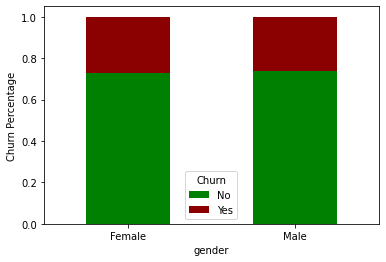

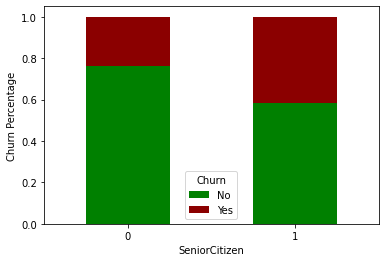

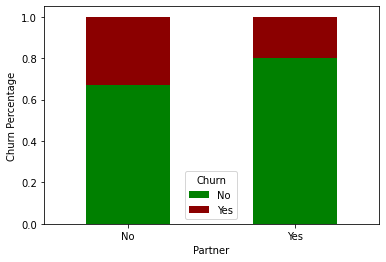

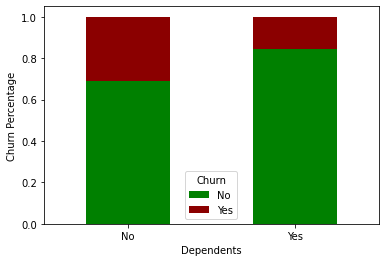

In [17]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

Inference-
Gender alone does not help us predict the customer churn.
If a person is young and has a family, he or she is less likely to stop the service as we can see below. The reason might be the busy life, more money or another factors.

Phone Service and Multiple lines

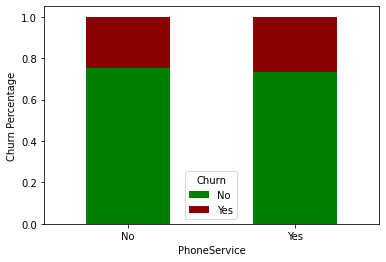

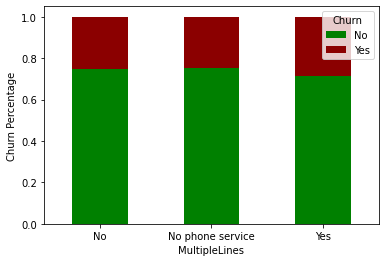

In [18]:
stacked_plot(df, "PhoneService", "Churn")
stacked_plot(df, "MultipleLines", "Churn")

Inference - As we can see multiplelines and phoneservice do not add value in the model having similar churn rate.

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

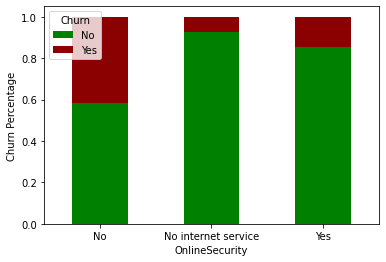

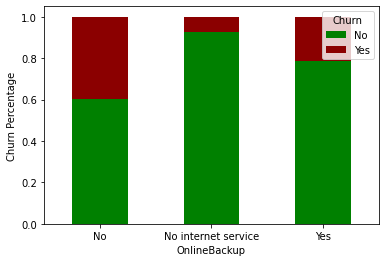

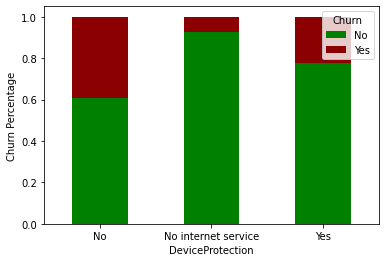

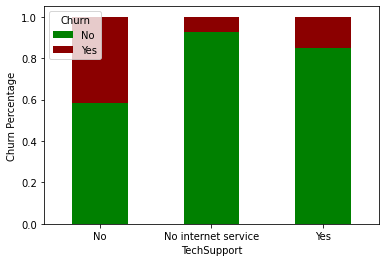

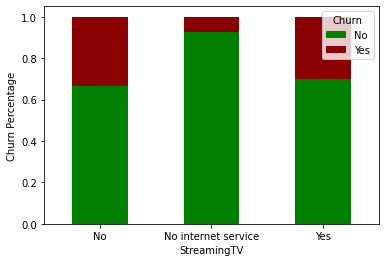

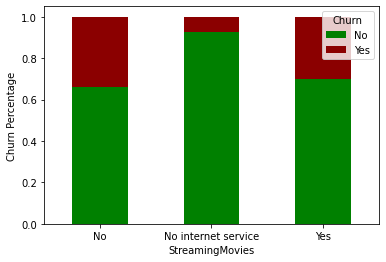

In [19]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

In all above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.

**Univariate Analysis of Numerical features**

In [20]:
  #Extract the numerical features from the dataset
  num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']
  print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


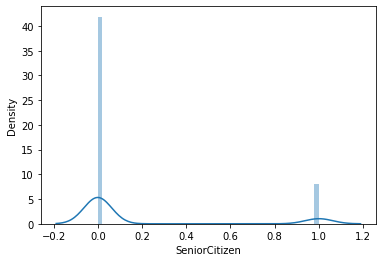

c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


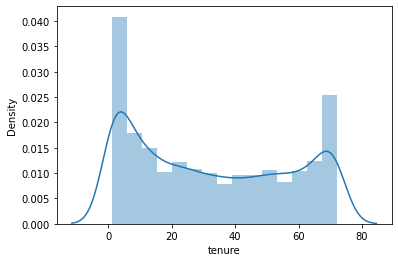

c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


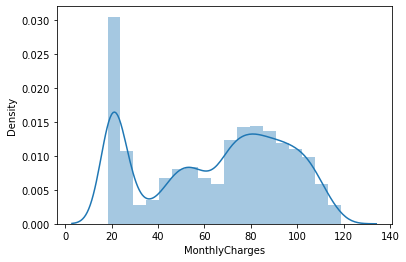

c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


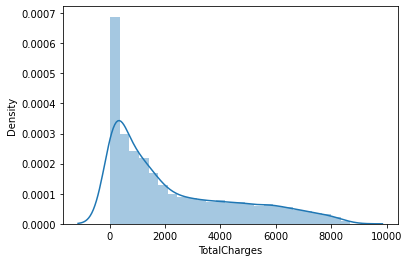

In [21]:
# Density plot of all the numerical features
for feature in num_var:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

**Inference - Senior citizen is categorical but represented as 1 or 0 so there is no need for normalizing them remaining attributes tenure, MonthlyCharges, TotalCharges are to be normalized**

**Bivariate Analysis**

c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Fut

Text(0.5, 1.0, 'Churn rate VS Tenure')

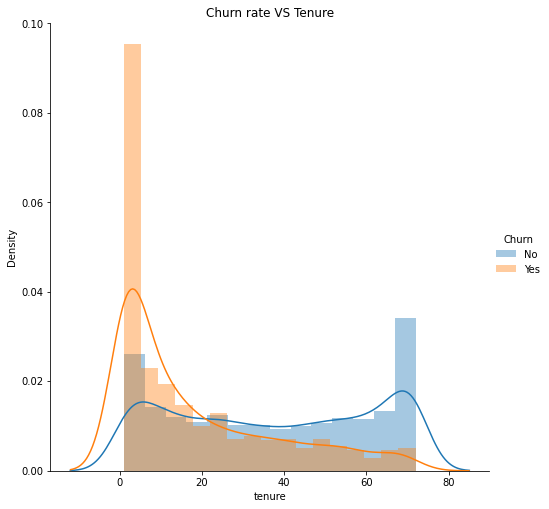

In [22]:
sns.FacetGrid(df, hue='Churn',size=7).map(sns.distplot, 'tenure').add_legend()
plt.title('Churn rate VS Tenure')

**Inference - Customers tenure from 0-20 have more churn rate**

c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Fut

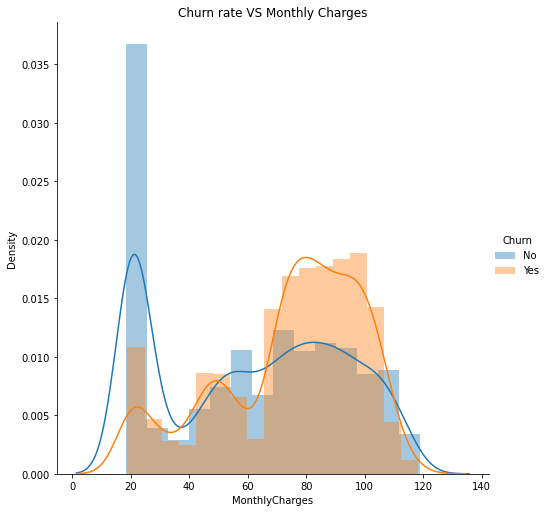

In [23]:
sns.FacetGrid(df, hue='Churn',size=7).map(sns.distplot, 'MonthlyCharges').add_legend()
plt.title('Churn rate VS Monthly Charges')
plt.show()

**Customers having monthly charges between 70 and 110 are more likely to churn out**

c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Fut

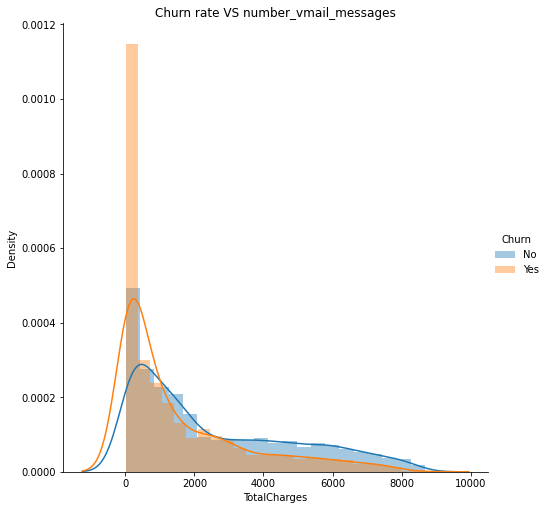

In [24]:
sns.FacetGrid(df, hue='Churn',size=7).map(sns.distplot, 'TotalCharges').add_legend()
plt.title('Churn rate VS number_vmail_messages')
plt.show()

**Customers having Total Charges between 0 to 1000 are likely to churn out**

In [25]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
large_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[large_cols] = scaler.fit_transform(df[large_cols])
df[large_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


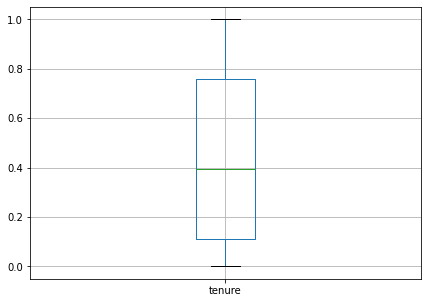

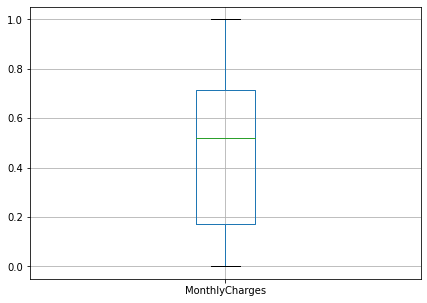

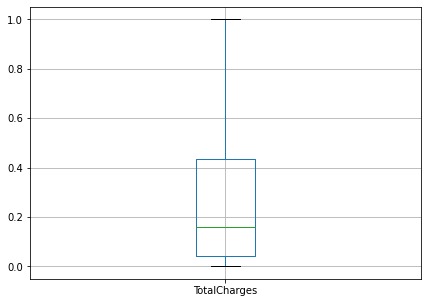

In [28]:
box_df = df[['tenure','MonthlyCharges','TotalCharges']]
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 7, 5
for column in box_df:
    plt.figure()
    box_df.boxplot([column])

In [29]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [30]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [31]:
print(df['gender'].value_counts(ascending=True))

Female    3483
Male      3549
Name: gender, dtype: int64


In [32]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,0.000000,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,0,0,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,0,0,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,0,0,No,No,0.619718,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,1,0,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


In [33]:
for i in df.columns:
    if (len(df[i].unique()) >2) & (df[i].dtypes != "int64") &(df[i].dtypes!= "float64"):
        print(i)

InternetService
Contract
PaymentMethod


In [34]:
print(df['InternetService'].value_counts(ascending=True))

No             1520
DSL            2416
Fiber optic    3096
Name: InternetService, dtype: int64


In [35]:
print(df['Contract'].value_counts(ascending=True))

One year          1472
Two year          1685
Month-to-month    3875
Name: Contract, dtype: int64


In [36]:
print(df['PaymentMethod'].value_counts(ascending=True))

Credit card (automatic)      1521
Bank transfer (automatic)    1542
Mailed check                 1604
Electronic check             2365
Name: PaymentMethod, dtype: int64


In [37]:
more_than_2 = ['InternetService' ,'Contract' ,'PaymentMethod']
df = pd.get_dummies(data=df, columns= more_than_2)
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                     float64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [38]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
df.shape

(7032, 27)

In [40]:
for i in df.columns:
    if (df[i].dtypes == "int64")  | (df[i].dtypes== "float64"):
        print(i)

gender
SeniorCitizen
tenure
MonthlyCharges
TotalCharges


In [41]:
for i in df.columns:
    if (df[i].dtypes == "object"):
        print(i)

Partner
Dependents
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
Churn


In [42]:
two_cate = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in two_cate:
    df[i].replace({"No":0, "Yes":1}, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


**Class imbalance issue**

1869
5163


Text(0.5, 1.0, 'Class distribution of the target variable')

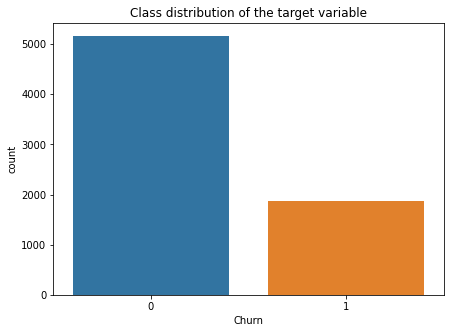

In [43]:
Churn = df[df["Churn"]==1]
Non_Churn = df[df["Churn"]==0]
print(len(Churn))
print(len(Non_Churn))
sns.countplot(x="Churn",data=df)
plt.title("Class distribution of the target variable")

In [44]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [45]:
X.shape, y.shape

((7032, 26), (7032,))

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

#Random Forest Classifier without applying SMOTE

In [47]:
model_rfcla = RandomForestClassifier(n_estimators=10,max_features=10,max_leaf_nodes=15,random_state=42)
model_rfcla.fit(X_train, y_train)
pred_rfcla = model_rfcla.predict(X_test)
model_rfcla.score(X_test,y_test)

0.7919000430848772

In [48]:
def print_metrics(cm):
  TP  = cm[1][1]
  TN = cm[0][0]
  FP = cm[0][1]
  FN = cm[1][0]
  accuracy = (TP+TN)/(TP+TN+FP+FN)
  precision = TP/(TP+FP) 
  recall = TP/(TP+FN)
  f1score = (2*precision*recall)/(precision+recall)
  print("Accuracy(%):",accuracy*100)
  print("Precision(%): ",precision*100)
  print("Recall(%): ",recall*100)
  print("F1 score: ",f1score*100)

In [49]:
cnf_rfcla = confusion_matrix(y_test,pred_rfcla)
cnf_rfcla

array([[1543,  168],
       [ 315,  295]], dtype=int64)

In [50]:
print_metrics(cnf_rfcla)

Accuracy(%): 79.19000430848772
Precision(%):  63.714902807775374
Recall(%):  48.36065573770492
F1 score:  54.98602050326189


# Logistic Regression without SMOTE

In [51]:
logistic_reg = LogisticRegression(penalty = 'l1',solver='liblinear',random_state = 1)
logistic_reg.fit(X_train,y_train)
lr_pred = logistic_reg.predict(X_test)
logistic_reg.score(X_test,y_test)

0.7996553209823352

In [52]:
cnf_lr = confusion_matrix(y_test,lr_pred)
cnf_lr

array([[1531,  180],
       [ 285,  325]], dtype=int64)

In [53]:
print_metrics(cnf_lr)

Accuracy(%): 79.96553209823351
Precision(%):  64.35643564356435
Recall(%):  53.278688524590166
F1 score:  58.29596412556054


#Decision Tree without SMOTE

In [54]:
decision_tree = DecisionTreeClassifier(max_features=10,max_leaf_nodes=20,random_state=1)
decision_tree.fit(X_train,y_train)
ydt_pred = decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.7824213700990952

In [55]:
cnf_dt = confusion_matrix(y_test,ydt_pred)
cnf_dt

array([[1434,  277],
       [ 228,  382]], dtype=int64)

In [56]:
print_metrics(cnf_dt)

Accuracy(%): 78.24213700990951
Precision(%):  57.96661608497724
Recall(%):  62.62295081967213
F1 score:  60.20488573680063


#Naive Bayes without SMOTE

In [57]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train.ravel())
y_pred_nb = model_nb.predict(X_test)
model_nb.score(X_test,y_test)

0.7423524342955623

In [58]:
cnf_nb = confusion_matrix(y_test,y_pred_nb)
cnf_nb

array([[1249,  462],
       [ 136,  474]], dtype=int64)

In [59]:
print_metrics(cnf_nb)

Accuracy(%): 74.23524342955623
Precision(%):  50.641025641025635
Recall(%):  77.70491803278688
F1 score:  61.319534282018104


#AdaBoost without SMOTE

In [60]:
model_ada = AdaBoostClassifier(learning_rate= 1,n_estimators= 25,random_state=42)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)
model_ada.score(X_test,y_test)

0.7992244722102542

In [61]:
cnf_ada = confusion_matrix(y_test,y_pred_nb)
cnf_ada

array([[1249,  462],
       [ 136,  474]], dtype=int64)

In [62]:
print_metrics(cnf_ada)

Accuracy(%): 74.23524342955623
Precision(%):  50.641025641025635
Recall(%):  77.70491803278688
F1 score:  61.319534282018104


#Multi layer perceptron without SMOTE

In [63]:
model_multi = MLPClassifier(solver='adam',hidden_layer_sizes=(10,))
model_multi.fit(X_train,y_train)
y_pred_multi = model_multi.predict(X_test)
model_multi.score(X_test,y_test)

c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8009478672985783

In [64]:
cnf_multi = confusion_matrix(y_test,y_pred_multi)
cnf_multi

array([[1514,  197],
       [ 265,  345]], dtype=int64)

In [65]:
print_metrics(cnf_multi)

Accuracy(%): 80.09478672985783
Precision(%):  63.65313653136532
Recall(%):  56.557377049180324
F1 score:  59.895833333333336


#**Applying smote**

In [66]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("before smote: ",Counter(y))
smote=SMOTE(random_state=0)
X_smote,y_smote = smote.fit_resample(X,y)
print("after smote:  ",Counter(y_smote))

before smote:  Counter({0: 5163, 1: 1869})
after smote:   Counter({0: 5163, 1: 5163})


In [67]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, random_state=1, test_size=0.33)

#Random Forest Classifier with SMOTE



In [68]:
model_rfcla_smote = RandomForestClassifier(n_estimators=10,max_features=15,max_leaf_nodes=25,random_state=42)
model_rfcla_smote.fit(X_train_smote, y_train_smote)
pred_rfcla_smote = model_rfcla_smote.predict(X_test_smote)
model_rfcla_smote.score(X_test_smote,y_test_smote)

0.7937206572769953

In [69]:
cnf_rfcla_smote = confusion_matrix(y_test_smote,pred_rfcla_smote)
cnf_rfcla_smote

array([[1320,  405],
       [ 298, 1385]], dtype=int64)

In [70]:
print_metrics(cnf_rfcla_smote)

Accuracy(%): 79.37206572769952
Precision(%):  77.37430167597765
Recall(%):  82.29352346999406
F1 score:  79.75813417794414


#Logistic Regression with SMOTE

In [71]:
logistic_reg_smote = LogisticRegression(penalty = 'l2',solver='liblinear',random_state = 1)
logistic_reg_smote.fit(X_train_smote,y_train_smote)
lr_pred_smote = logistic_reg_smote.predict(X_test_smote)
logistic_reg_smote.score(X_test_smote,y_test_smote)

0.801056338028169

In [72]:
cnf_logistic_smote = confusion_matrix(y_test_smote,lr_pred_smote)
cnf_logistic_smote

array([[1334,  391],
       [ 287, 1396]], dtype=int64)

In [73]:
print_metrics(cnf_logistic_smote)

Accuracy(%): 80.1056338028169
Precision(%):  78.11975377728035
Recall(%):  82.94711824123588
F1 score:  80.46109510086454


#Naive Bayes with SMOTE

In [74]:
model_nb_smote = GaussianNB()
model_nb_smote.fit(X_train_smote, y_train_smote.ravel())
y_pred_nb_smote = model_nb_smote.predict(X_test_smote)
model_nb_smote.score(X_test_smote,y_test_smote)

0.7655516431924883

In [75]:
cnf_nb_smote = confusion_matrix(y_test_smote,y_pred_nb_smote)
cnf_nb_smote

array([[1246,  479],
       [ 320, 1363]], dtype=int64)

In [76]:
print_metrics(cnf_nb_smote)

Accuracy(%): 76.55516431924883
Precision(%):  73.9956568946797
Recall(%):  80.9863339275104
F1 score:  77.33333333333331


#Decision tree with SMOTE

In [77]:
decision_tree_smote = DecisionTreeClassifier(max_features=15,max_leaf_nodes=20,random_state=1)
decision_tree_smote.fit(X_train_smote,y_train_smote)
ydt_pred_smote = decision_tree_smote.predict(X_test_smote)
decision_tree_smote.score(X_test_smote,y_test_smote)

0.7690727699530516

In [78]:
cnf_dt_smote = confusion_matrix(y_test_smote,ydt_pred_smote)
cnf_dt_smote

array([[1309,  416],
       [ 371, 1312]], dtype=int64)

In [79]:
print_metrics(cnf_dt_smote)

Accuracy(%): 76.90727699530517
Precision(%):  75.92592592592592
Recall(%):  77.95603089720736
F1 score:  76.9275872178247


#Adaboost with SMOTE

In [80]:
model_ada_smote = AdaBoostClassifier(learning_rate= 1,n_estimators= 60,random_state=42)
model_ada_smote.fit(X_train_smote, y_train_smote)
y_pred_ada_smote = model_ada_smote.predict(X_test_smote)
model_ada_smote.score(X_test_smote,y_test_smote)

0.7946009389671361

In [81]:
cnf_ada_smote = confusion_matrix(y_test_smote,y_pred_ada_smote)
cnf_ada_smote

array([[1293,  432],
       [ 268, 1415]], dtype=int64)

In [82]:
print_metrics(cnf_ada_smote)

Accuracy(%): 79.46009389671362
Precision(%):  76.61072008662696
Recall(%):  84.07605466428996
F1 score:  80.16997167138811


#Multi layer perceptron with SMOTE

In [83]:
model_multi_smote = MLPClassifier(solver='adam',hidden_layer_sizes=(10,))
model_multi_smote.fit(X_train_smote,y_train_smote)
y_pred_multi_smote = model_multi_smote.predict(X_test_smote)
model_multi_smote.score(X_test_smote,y_test_smote)

c:\Users\Jeeshitha Sai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8019366197183099

In [84]:
cnf_multi_smote = confusion_matrix(y_test_smote,y_pred_multi_smote)
cnf_multi_smote

array([[1315,  410],
       [ 265, 1418]], dtype=int64)

In [85]:
print_metrics(cnf_multi_smote)

Accuracy(%): 80.19366197183099
Precision(%):  77.57111597374178
Recall(%):  84.25430778371955
F1 score:  80.77470806038166


C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_14376\1043838077.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_14376\1043838077.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_14376\1043838077.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\U

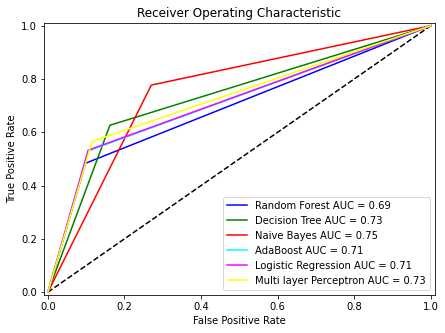

C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_14376\1043838077.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_14376\1043838077.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\Users\Jeeshitha Sai\AppData\Local\Temp\ipykernel_14376\1043838077.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
C:\U

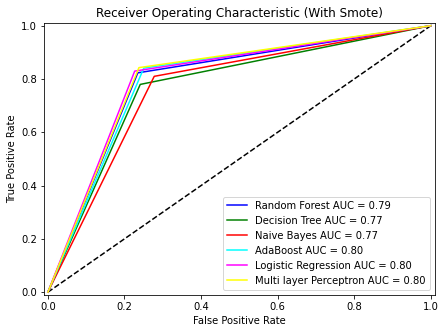

In [86]:

models = [
          "Random Forest",
          "Decision Tree",
          "Naive Bayes",
          "AdaBoost",
          "Logistic Regression",
          "Multi layer Perceptron"
]
preds=[
       pred_rfcla,
       ydt_pred,
       y_pred_nb,
       y_pred_ada,
       lr_pred,
       y_pred_multi
]

preds2 =[
    pred_rfcla_smote,
    ydt_pred_smote,
    y_pred_nb_smote,
    y_pred_ada_smote,
    lr_pred_smote,
    y_pred_multi_smote
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black'
]
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, preds[i], models[i])
    
plt.show()

plt.title('Receiver Operating Characteristic (With Smote)')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

for i,model in list(enumerate(models)):
  plot_roc_curves(y_test_smote,preds2[i],models[i])
plt.show()